# <center>Binary Classification using CNN</center>

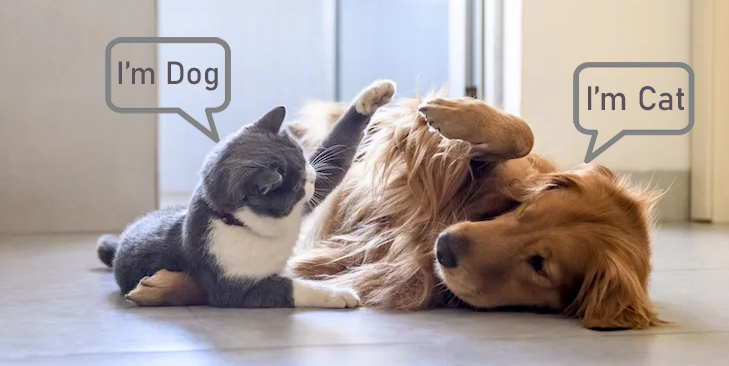

####  <center>Cat Vs Dog Classification</center>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# 1. Retrieving Image

In [2]:
'''
Defining Generator function
'''
train_data=keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_data=keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
'''
Normalizing image into 0 to 255
'''
def normalize(img,label):
  img=tf.cast(img/255.,tf.float32)
  return img,label

train_data=train_data.map(normalize)
validation_data=validation_data.map(normalize)


# 2. Model Architecture

In [4]:
'''
Model Architecture
'''
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

# 3. Fitting Data

In [6]:
#Compiling Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
#Fitting data
history=model.fit(train_data, epochs=10,validation_data=validation_data)

Epoch 1/10
625/625 [==============================] - 134s 197ms/step - loss: 0.6168 - accuracy: 0.6482 - val_loss: 0.5157 - val_accuracy: 0.7458
Epoch 2/10
625/625 [==============================] - 53s 83ms/step - loss: 0.4740 - accuracy: 0.7691 - val_loss: 0.4412 - val_accuracy: 0.7932
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3555 - accuracy: 0.8376 - val_loss: 0.4423 - val_accuracy: 0.8126
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2277 - accuracy: 0.9048 - val_loss: 0.5477 - val_accuracy: 0.7942
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1213 - accuracy: 0.9537 - val_loss: 0.7387 - val_accuracy: 0.7982
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0769 - accuracy: 0.9724 - val_loss: 1.0021 - val_accuracy: 0.7994
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0557 - accuracy: 0.9807 - val_loss: 0.9827 - val_accurac

# 4. Checking Accuracy

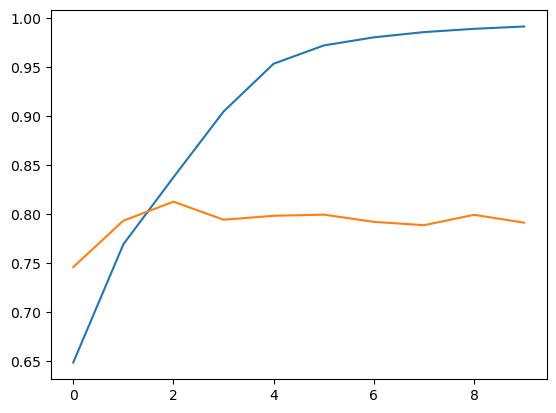

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.show()

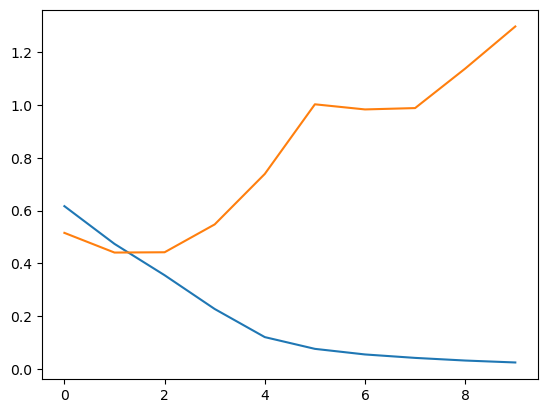

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.show()

# 5. Prediction

In [10]:
import cv2

In [11]:
'''
Function:
0->Cat
1->Dog
Based on Directory position
'''
def imageis(arr):
  if arr==0:
    print("Cat")
  else:
    print("Dog")

In [12]:
# Reading image
test_img=cv2.imread('/kaggle/input/cat-and-dog/Cat and Dog/ima.jpg')

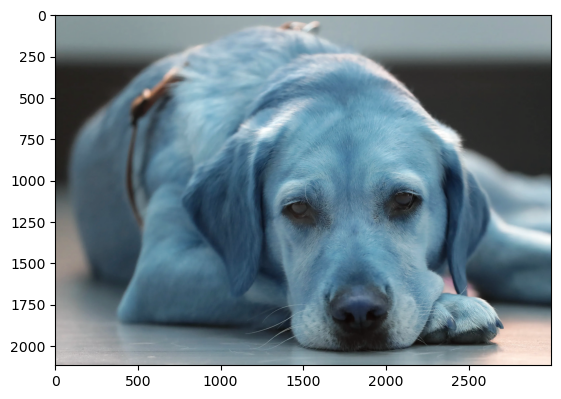

In [13]:
# Showing Image
plt.imshow(test_img)

In [14]:
# Getting Shape
test_img.shape

(2117, 3000, 3)

In [15]:
# Resizing shape into 256x256
test_img=cv2.resize(test_img,(256,256))

In [16]:
# Converting into batch of 1
test_inp=test_img.reshape((1,256,256,3))

In [17]:
# Prediction
pred=model.predict(test_inp)

1/1 [==============================] - 0s 184ms/step


In [18]:
# Output from prediction
imageis(pred)

Dog


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#bb7d4e;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 5px; color:white; text-align:center"></p>
</div>

In [19]:
# Reading image
test_img=cv2.imread('/kaggle/input/cat-and-dog/Cat and Dog/ime.jpg')

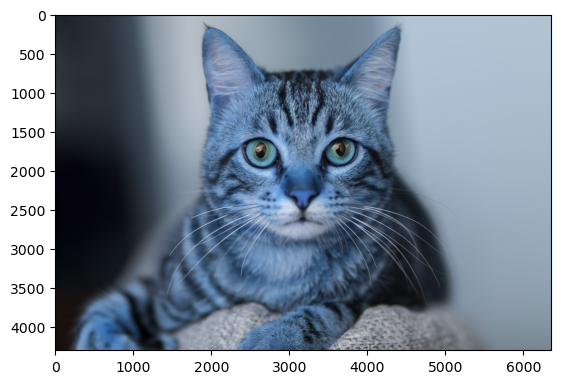

In [20]:
# Showing Image
plt.imshow(test_img)

In [21]:
# Getting Shape
test_img.shape

(4299, 6359, 3)

In [22]:
# Resizing shape into 256x256
test_img=cv2.resize(test_img,(256,256))

In [23]:
# Converting into batch of 1
test_inp2=test_img.reshape((1,256,256,3))

In [24]:
# Prediction
pred2=model.predict(test_inp2)

1/1 [==============================] - 0s 22ms/step


In [25]:
# Output from prediction
imageis(pred2)

Cat


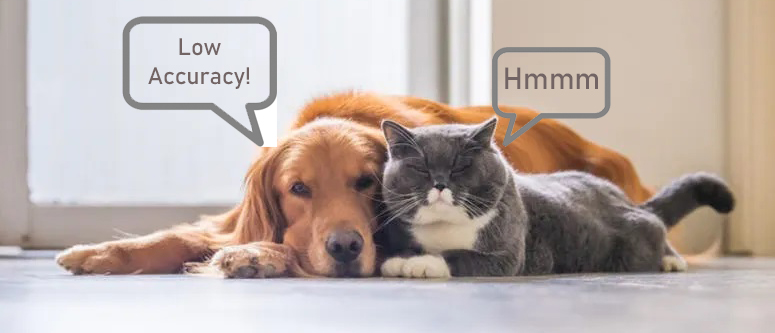

# 6. Reduce Overfitting

In [26]:
'''
Methods used:
1. Data Augmentation
2. Dropout
3. Batch Normalization
'''

'\nMethods used:\n1. Data Augmentation\n2. Dropout\n3. Batch Normalization\n'

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array,img_to_array, load_img

In [28]:
'''
Defining Augmentation Methods
'''
batch_size=32
data_gen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_gen=ImageDataGenerator(
    rescale=1./255
)

train_generator=data_gen.flow_from_directory(
    '/kaggle/input/dogs-vs-cats/train',
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='binary'
    )

test_generator=data_gen.flow_from_directory(
    '/kaggle/input/dogs-vs-cats/test',
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='binary'
    )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [29]:
'''
Architecture with Batch Normalization and Dropout
'''
model1=Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization()) #Batch Normalization
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization()) #Batch Normalization
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization()) #Batch Normalization
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1)) #Dropout
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.1)) #Dropout
model1.add(Dense(1,activation='sigmoid'))

In [30]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
'''
Fitting Model with fit_generated:
Only generated image will be used
'''
history1=model1.fit_generator(
    train_generator,
    steps_per_epoch=20000//batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=5000//batch_size
)

/tmp/ipykernel_23/4225150038.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model1.fit_generator(


Epoch 1/5
625/625 [==============================] - 391s 620ms/step - loss: 1.3753 - accuracy: 0.5649 - val_loss: 0.6661 - val_accuracy: 0.5719
Epoch 2/5
625/625 [==============================] - 388s 621ms/step - loss: 0.6582 - accuracy: 0.5965 - val_loss: 0.6329 - val_accuracy: 0.6262
Epoch 3/5
625/625 [==============================] - 390s 623ms/step - loss: 0.6749 - accuracy: 0.6262 - val_loss: 0.6001 - val_accuracy: 0.6935
Epoch 4/5
625/625 [==============================] - 376s 601ms/step - loss: 0.5981 - accuracy: 0.6862 - val_loss: 0.6104 - val_accuracy: 0.6863
Epoch 5/5
625/625 [==============================] - 386s 617ms/step - loss: 0.5562 - accuracy: 0.7227 - val_loss: 0.7154 - val_accuracy: 0.5621


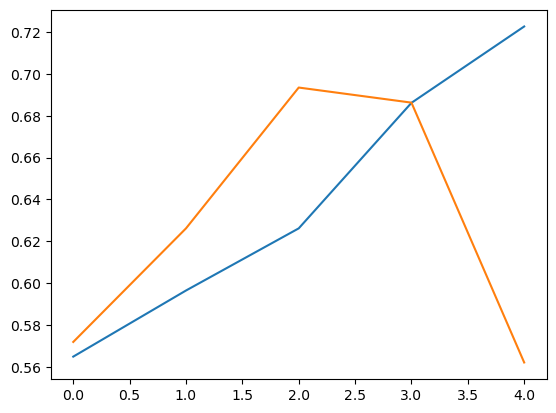

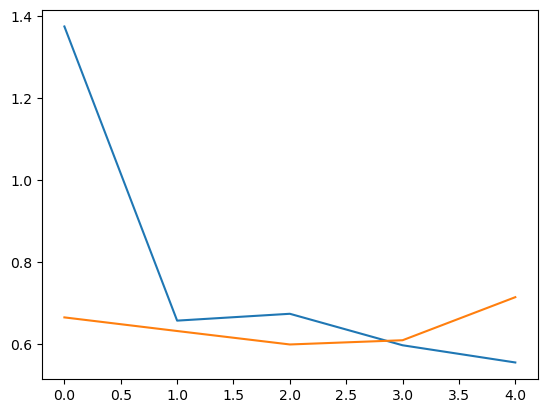

In [32]:
# Plottings
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'],label='train')
plt.plot(history1.history['val_accuracy'],label='validation')
plt.show()

import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='validation')
plt.show()

1/1 [==============================] - 0s 111ms/step
Dog


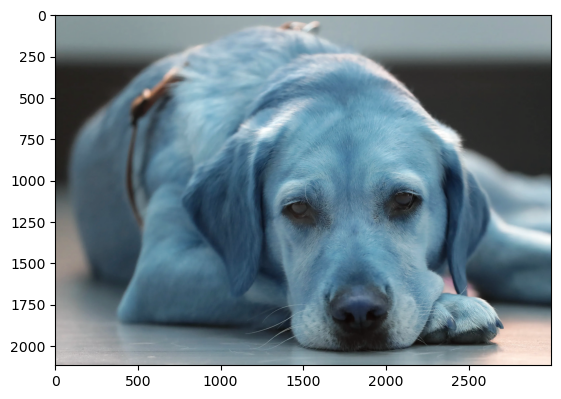

In [33]:
# Prediction
test_img=cv2.imread('/kaggle/input/cat-and-dog/Cat and Dog/ima.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_inp=test_img.reshape((1,256,256,3))
pred=model1.predict(test_inp)
imageis(pred)

1/1 [==============================] - 0s 41ms/step
Dog


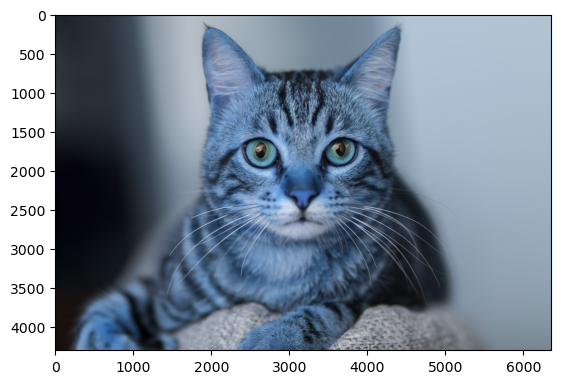

In [34]:
# Prediction
test_img=cv2.imread('/kaggle/input/cat-and-dog/Cat and Dog/ime.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_inp=test_img.reshape((1,256,256,3))
pred=model1.predict(test_inp)
imageis(pred)

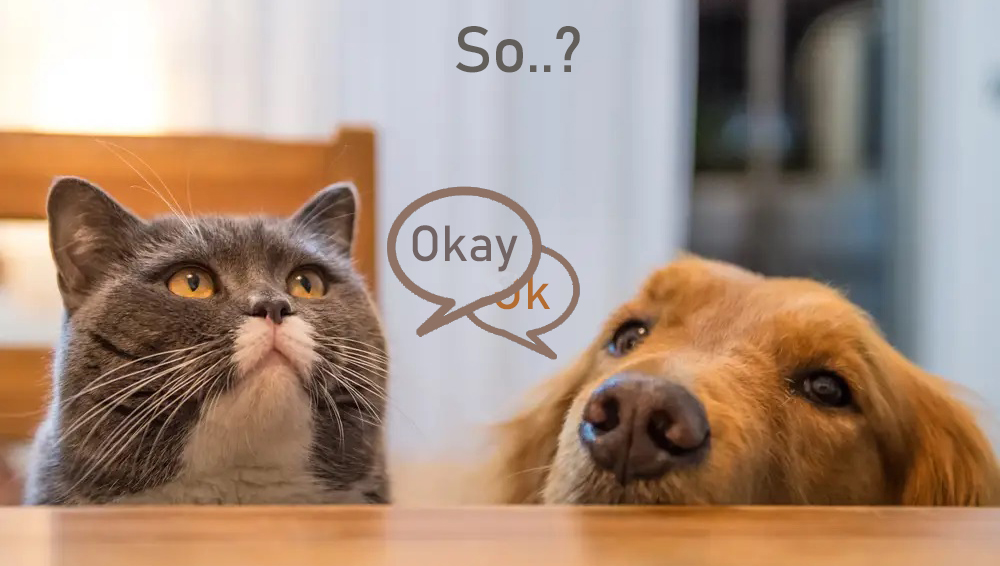

#### <center>Left Side: Cat</center>
#### <center>Right Side: Dog</center>